<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

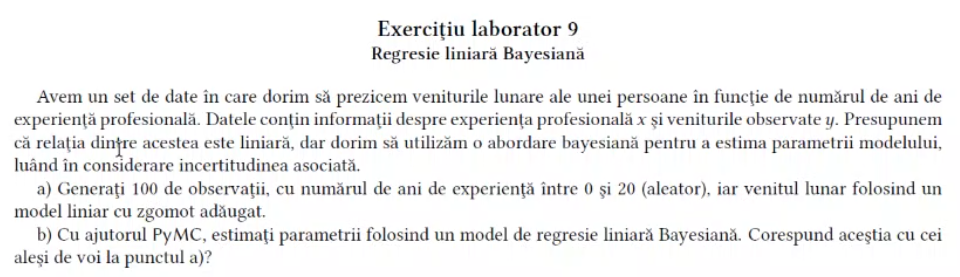

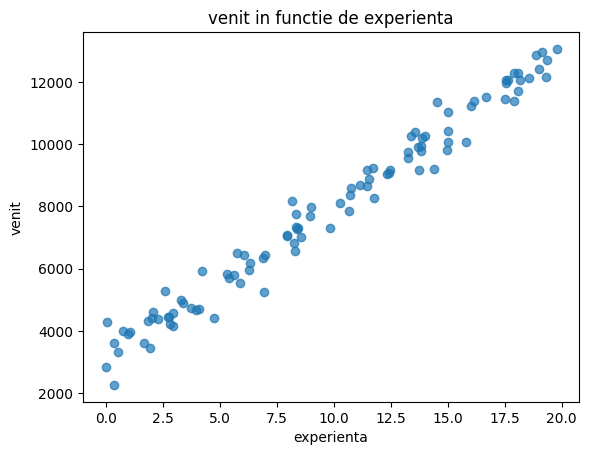

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
N = 100
x = np.random.uniform(0, 20, N)
a = 500
b = 3000
eps = np.random.normal(0, 500, N)

y = a * x + b + eps

plt.scatter(x, y, alpha=0.7)
plt.title('venit in functie de experienta')
plt.xlabel('experienta')
plt.ylabel('venit')
plt.show()


Output()

Output()

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,493.983,7.812,479.614,510.021,0.260,0.184,905.0,749.0,1.01
b,3092.961,90.664,2911.450,3263.218,3.024,2.147,903.0,765.0,1.01
eps,454.809,33.902,394.264,524.462,1.031,0.730,1085.0,753.0,1.00
mu[0],7212.994,47.441,7120.812,7307.206,1.215,0.860,1523.0,1175.0,1.00
mu[1],10209.517,56.937,10095.321,10313.354,1.371,0.969,1706.0,1430.0,1.00
...,...,...,...,...,...,...,...,...,...
mu[95],5434.705,61.528,5312.182,5554.084,1.887,1.336,1059.0,846.0,1.00
mu[96],12018.038,77.545,11854.678,12162.919,2.121,1.500,1344.0,1023.0,1.00
mu[97],8760.715,46.924,8666.179,8844.386,1.035,0.732,2044.0,1399.0,1.01
mu[98],3121.318,90.276,2941.724,3292.563,3.010,2.137,905.0,765.0,1.00


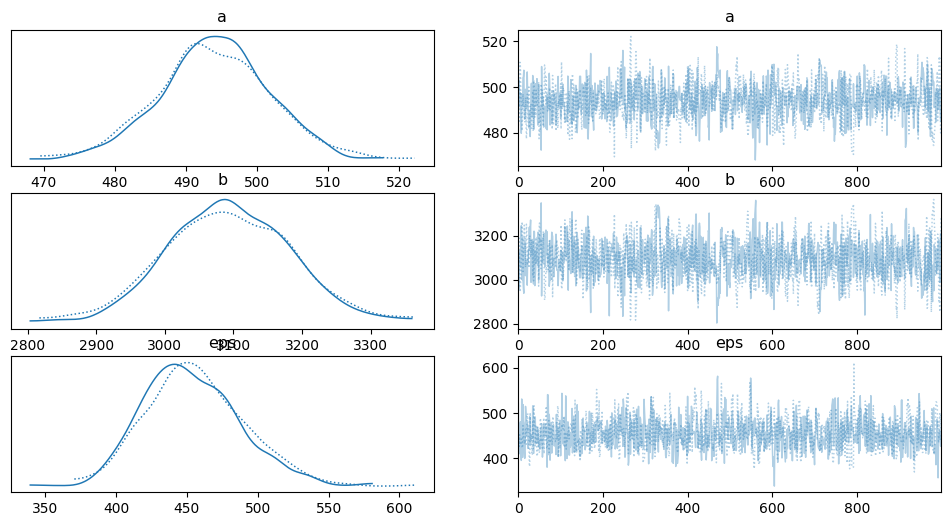

In [11]:
import pymc as pm

with pm.Model() as model:
    a = pm.Normal('a', mu=0, sigma=500)    #aici tin cont de distrib datelor initiale. am date mari deci si sigma e mai mare. as putea normaliza la inceput si sa consider sigma_a = 10, sigma_b = 1
    b = pm.Normal('b', mu=0, sigma=1000)
    eps = pm.HalfCauchy('eps', 100)

    mu = pm.Deterministic('mu', a * x + b)

    y_pred = pm.Normal('y_pred', mu=mu, sigma=eps, observed=y)

    trace = pm.sample(1000, tune=2000, return_inferencedata=True)

pm.plot_trace(trace, var_names=['a', 'b', 'eps'])
pm.summary(trace, hdi_prob=0.95)
